# Digit Recognizer


## Importing libraries
* <i>pandas</i> for importing datasets and pre-processing.
* <i>numpy</i> for mathmematical operations.
* <i>matplotlib</i> and <i>seaborn</i> for graphical visualization.
* <i>keras</i> and <i>sklearn</i> for model construction, model fitting and model accuracy calculation.


In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator

from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

## Importing training and testing datasets
* 42000 samples of 28x28 images of handwritten digits.
* Each column represents pixel value for each of the 784 pixels.
* One additional column is for the label of the digit that row represents.

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data.shape
#display(train_data.head())
#display(test_data.head())

(42000, 785)

In [114]:
X_train = (train_data.iloc[:,1:].values).astype('float32') 
Y_train = train_data.iloc[:,0].values.astype('int32')
X_test = test_data.values.astype('float32')

In [115]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [116]:
Y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

## Data Visualization
* Reshaping flattened pixel values into a 28x28 matrix.
* Plotting the first 5 images along with the digit label as plot title.

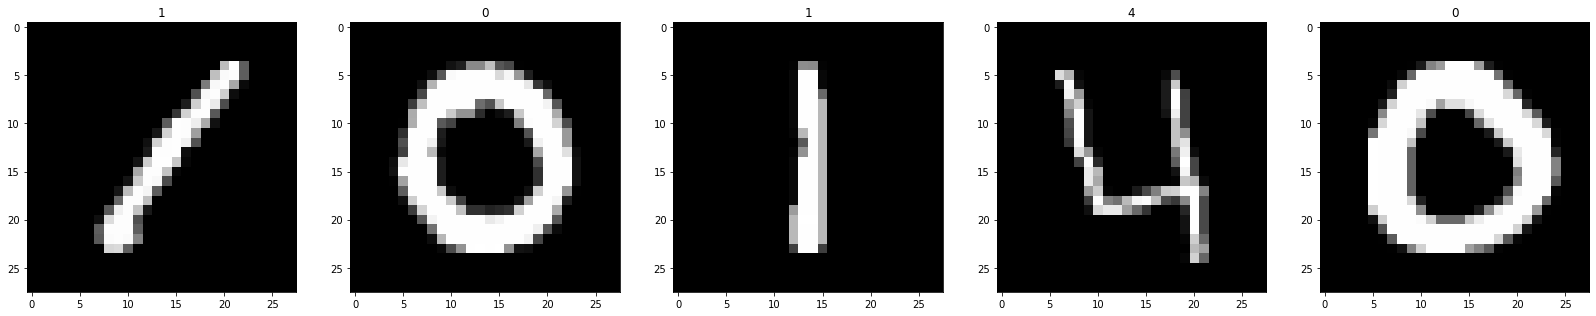

In [117]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

fig, axs = plt.subplots(1,5,figsize=(28,28))

for i in range(5):
    axs[i].imshow(X_train[i], cmap=plt.get_cmap('gray'))
    axs[i].set_title(Y_train[i]);

## Data Pre-processing

### Adding color channel before feeding to NN
* Adding an extra colour channel which will represent grey value.

In [118]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Feature scaling
* Standardizing for zero mean and unit std dev.

In [119]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

### Converting Y parameter to categorical
* Output layer of the NN should contain 10 neurons, one for each digit.

In [120]:
from keras.utils.np_utils import to_categorical
Y_train= to_categorical(Y_train)
num_classes = Y_train.shape[1]
num_classes

10

## Building Machine Learning Model

### Generating training and validation sets and creating batches

In [123]:
X = X_train
Y = Y_train
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.10, random_state=42)
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, Y_train, batch_size=64)
val_batches=gen.flow(X_val, Y_val, batch_size=64)

### Building the NN
* The input layer takes a 28 x 28 x 1 tensor which is standardized and flattened resulting in a input layer size of 784.
* The output layer is of size 10, one perceptron for each of the 10 digits.
* Using [this](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw) answer to choose the number of neurons in hidden layers.

In [124]:
model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
        ])
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [125]:
epochs = 3
batch_size = batches.n/epochs
history=model.fit(batches, batch_size=batch_size,epochs=epochs,validation_data=val_batches)

Epoch 1/3
591/591 [==============================] - 8s 9ms/step - loss: 0.3880 - accuracy: 0.8774 - val_loss: 0.1317 - val_accuracy: 0.9545
Epoch 2/3
591/591 [==============================] - 5s 8ms/step - loss: 0.0876 - accuracy: 0.9735 - val_loss: 0.1108 - val_accuracy: 0.9640
Epoch 3/3
591/591 [==============================] - 5s 9ms/step - loss: 0.0588 - accuracy: 0.9812 - val_loss: 0.0955 - val_accuracy: 0.9712


### Saving predictions
* Saving predictions to .csv for submission.

In [126]:
predictions = np.argmax(model.predict(X_test), axis=-1)

submission=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions})
submission.to_csv("my_submission.csv", index=False, header=True)